Fatemeh Amanian

Train neural network models (at least two different networks for each dataset, i.e., no. layers, no. neurons, activation, ...) in either Tensorflow or Pytorch to perform classification on the following datasets:

MNIST

In [1]:
import sys
from matplotlib import pyplot
import numpy as np
import PIL

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Download the data:

In [2]:
!mkdir /content/data
!mkdir /content/data/mnist
!wget "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
!wget "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
!wget "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
!wget "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
!mv  -v * /content/data/mnist

--2020-10-26 03:30:03--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 172.67.171.76, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.1MB/s    in 0.9s    

2020-10-26 03:30:04 (11.1 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-10-26 03:30:04--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 172.67.171.76, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB

In [3]:
!gunzip /content/data/mnist/*.gz

Import data:

In [4]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

path='./data/mnist'
train_data, train_labels = loadMNIST( "train", path)
test_data, test_labels = loadMNIST( "t10k", path)

print(train_data.shape)
print(len(train_labels))

print(test_data.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [5]:
classes = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]

Normalization:

In [6]:
train_set = ((train_data[..., np.newaxis]/255.0), np.asarray(train_labels))
test_set = (test_data[..., np.newaxis]/255.0, np.asarray(test_labels))
# (x_train-x_train.mean())/x_train.std()
print(train_set[0].shape, train_set[1].shape)
print(test_set[0].shape, test_set[1].shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


5


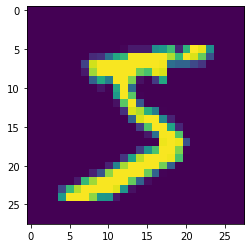

In [7]:
pyplot.imshow(np.squeeze(train_set[0][0]))
print(classes[train_set[1][0]])

Define a Convolutional Neural Network

In [8]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

Define a Loss function and optimizer

In [9]:
# compile model
opt1 = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [10]:
epochs=30
# fit model
history1 = model1.fit(train_set[0], train_set[1], epochs=epochs, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc1 = model1.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc1 * 100.0))

Epoch 1/30
938/938 [==============================] - 5s 6ms/step - loss: 0.2952 - accuracy: 0.9125 - val_loss: 0.1537 - val_accuracy: 0.9568
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1307 - accuracy: 0.9615 - val_loss: 0.1047 - val_accuracy: 0.9697
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0891 - accuracy: 0.9742 - val_loss: 0.0829 - val_accuracy: 0.9745
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0685 - accuracy: 0.9804 - val_loss: 0.0595 - val_accuracy: 0.9821
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0559 - accuracy: 0.9839 - val_loss: 0.0500 - val_accuracy: 0.9840
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0483 - accuracy: 0.9863 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0465 - val_accuracy: 0.9838
Epoch 

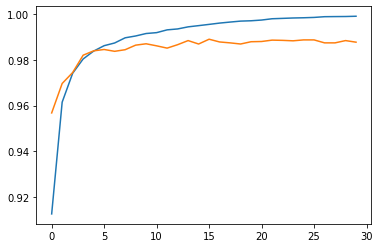

In [11]:
pyplot.plot(range(0,epochs), history1.history['accuracy'])
pyplot.plot(range(0,epochs), history1.history['val_accuracy'])

Model 2:

In [12]:
from tensorflow.keras.layers import Dropout
model2 = Sequential()
model2.add(Conv2D(32, (6, 6), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(198, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))
# compile model
opt2 = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
epochs2=30
# fit model
history2 = model2.fit(train_set[0], train_set[1], epochs=epochs2, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc2 = model2.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc2 * 100.0))

Epoch 1/30
938/938 [==============================] - 5s 6ms/step - loss: 0.4490 - accuracy: 0.8604 - val_loss: 0.1455 - val_accuracy: 0.9573
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.1896 - accuracy: 0.9439 - val_loss: 0.0907 - val_accuracy: 0.9727
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.1361 - accuracy: 0.9595 - val_loss: 0.0684 - val_accuracy: 0.9790
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.0565 - val_accuracy: 0.9816
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.0499 - val_accuracy: 0.9831
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0830 - accuracy: 0.9750 - val_loss: 0.0442 - val_accuracy: 0.9854
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 

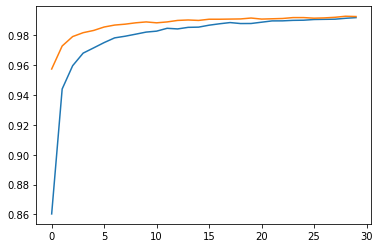

In [14]:
pyplot.plot(range(0,epochs2), history2.history['accuracy'])
pyplot.plot(range(0,epochs2), history2.history['val_accuracy'])

Looks like adding dropouts decreased the distance between training and test accuracy. It's probably because the model don't overfit to the training data.

Let's now save our precious models:

In [ ]:
model1.save('mnist1.h5')
model2.save('mnist2.h5') 